# Setup

In [ ]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [ ]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

Batch size: 16, epochs: 50, optimizer: Adam 

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=16, shuffle=True, num_workers=4)

In [ ]:
# LOOKING AT THE AUGMENTATIONS 

# inputs, classes = next(iter(dataloader_train_aug1))
# out = torchvision.utils.make_grid(inputs)
# imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning and optimizer

In [ ]:
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = torch.optim.Adam(untrained_model_aug1.parameters(), lr=0.001)
#optimizer = get_optimizer(untrained_model_aug1)

### Training

In [ ]:
trained_model_aug1, trained_aug1_info = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug1)

In [ ]:
torch.save({"aug": trained_model_aug1.state_dict(), "aug_info": trained_aug1_info},"aug1Model_50.tar")

### Training Results

In [ ]:
plot_loss(trained_aug1_info["train_loss"], trained_aug1_info["val_loss"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, trained_model_aug1, device)
print("Accuracy: ", (np.sum(predl==truel)/predl.size * 100))
print(classification_report(truel, predl, target_names=class_labels))

### Finetuning

In [ ]:
unfreeze_layers(trained_model_aug1)
model_aug1, model_aug1_info = train_model(model=trained_model_aug1, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug1)

In [ ]:
torch.save({"aug1": model_aug1.state_dict(), "aug1_info": model_aug1_info, "freeze_aug1_info": trained_aug1_info},"aug1Model_60.tar")

### Round 1 results

In [ ]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [ ]:
print(classification_report(truel, predl, target_names=class_labels))

### On feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


## Augmentation Round 2

Add blur and colorjitter

In [19]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=16, shuffle=True, num_workers=2)

Load in a fresh ResNet50 that's prepped for transfer learning

In [20]:
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = torch.optim.Adam(untrained_model_aug2.parameters(), lr=0.001)
#optimizer = get_optimizer(untrained_model_aug2) 

### Training

In [21]:
trained_model_aug2, trained_aug2_info = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug2) 

Epoch 1/50
----------
Train Loss: 1.6985 Acc: 0.4443
Val Loss: 1.6322 Acc: 0.4327
Epoch time 2m 25s
----------

Epoch 2/50
----------
Train Loss: 1.2465 Acc: 0.6802
Val Loss: 1.4222 Acc: 0.6154
Epoch time 2m 25s
----------

Epoch 3/50
----------
Train Loss: 1.0568 Acc: 0.7461
Val Loss: 1.3617 Acc: 0.6154
Epoch time 2m 25s
----------

Epoch 4/50
----------
Train Loss: 0.8906 Acc: 0.7665
Val Loss: 1.2329 Acc: 0.6442
Epoch time 2m 26s
----------

Epoch 5/50
----------
Train Loss: 0.8340 Acc: 0.7904
Val Loss: 1.1895 Acc: 0.6731
Epoch time 2m 26s
----------

Epoch 6/50
----------
Train Loss: 0.7518 Acc: 0.8084
Val Loss: 1.1450 Acc: 0.6635
Epoch time 2m 25s
----------

Epoch 7/50
----------
Train Loss: 0.6880 Acc: 0.8228
Val Loss: 1.0679 Acc: 0.7212
Epoch time 2m 25s
----------

Epoch 8/50
----------
Train Loss: 0.6617 Acc: 0.8084
Val Loss: 1.0281 Acc: 0.6923
Epoch time 2m 25s
----------

Epoch 9/50
----------
Train Loss: 0.6174 Acc: 0.8251
Val Loss: 1.0624 Acc: 0.6827
Epoch time 2m 26s
----

In [22]:
torch.save({"aug": trained_model_aug2.state_dict(), "aug_info": trained_aug2_info},"aug2Model_50.tar")

### Training Results

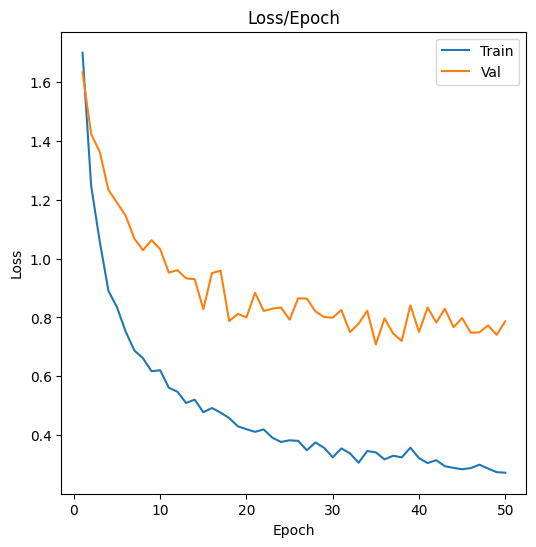

In [23]:
plot_loss(trained_aug2_info["train_loss"], trained_aug2_info["val_loss"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, trained_model_aug2, device)
print("Accuracy: ", (np.sum(predl==truel)/predl.size * 100))
print(classification_report(truel, predl, target_names=class_labels))

### Finetuning

In [ ]:
unfreeze_layers(trained_model_aug2)
model_aug2, model_aug2_info = train_model(model=trained_model_aug2, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug2)

In [ ]:
torch.save({"aug2": model_aug2.state_dict(), "aug2_info": model_aug2_info, "freeze_aug1_info": trained_aug2_info},"aug2Model_40.tar")

### Round 2 Results

In [ ]:
visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug2_info["train_acc"], model_aug2_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

### On feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

## Augmentation round 3

Try without jitter

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=16, shuffle=True, num_workers=2)

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = torch.optim.Adam(untrained_model_aug3.parameters(), lr=0.001)
# optimizer = get_optimizer(untrained_model_aug3) 

### Training
First with the frozen layers, then unfreeze for finetuning

In [ ]:
trained_model_aug3, trained_aug3_info = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug3) 

In [ ]:
torch.save({"aug": trained_model_aug3.state_dict(), "aug_info": trained_aug3_info},"aug3Model_50.tar")

### Training Results

In [ ]:
plot_loss(trained_aug3_info["train_loss"], trained_aug3_info["val_loss"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, trained_model_aug3, device)
print("Accuracy: ", (np.sum(predl==truel)/predl.size * 100))
print(classification_report(truel, predl, target_names=class_labels))

### Finetuning

In [ ]:
unfreeze_layers(trained_model_aug3)
model_aug3, model_aug3_info = train_model(model=trained_model_aug3, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug3)

In [ ]:
torch.save({"aug3": model_aug3.state_dict(), "aug3_info": model_aug3_info, "freeze_aug3_info": trained_aug3_info},"aug3Model_40.tar")

### Round 3 Results

In [ ]:
visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

### On Feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))